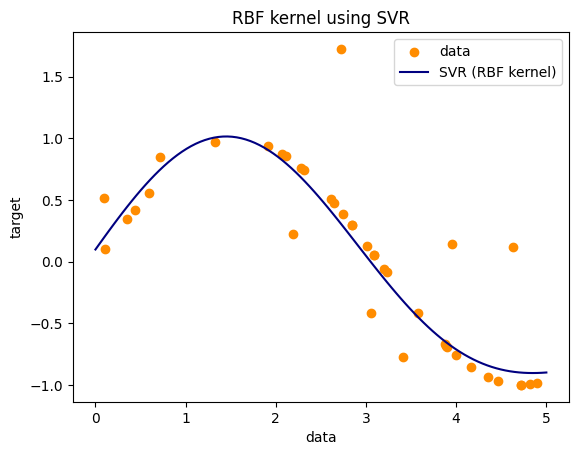

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Generate sample data
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(8))

# Fit SVR model with radial basis function (RBF) kernel
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(X, y)

# Plot the results
X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
y_rbf = svr_rbf.predict(X_plot)

plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_plot, y_rbf, color='navy', label='SVR (RBF kernel)')
plt.xlabel('data')
plt.ylabel('target')
plt.title('RBF kernel using SVR')
plt.legend()
plt.show()


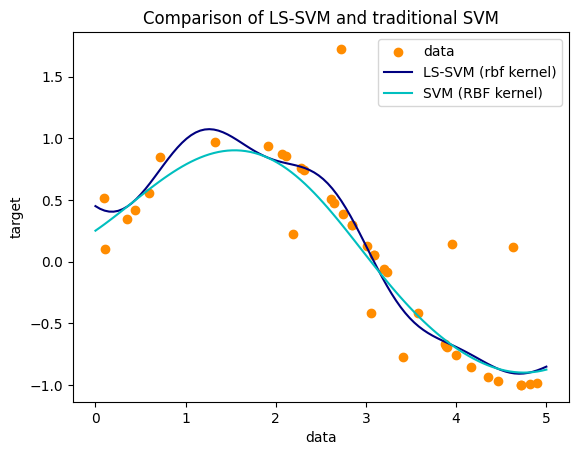

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Generate sample data
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(8))

# Fit LS-SVM model with linear kernel
lsvm_linear = SVR(kernel='rbf', C=1e3)
lsvm_linear.fit(X, y)

# Fit traditional SVM model with radial basis function (RBF) kernel
svm_rbf = SVR()
svm_rbf.fit(X, y)

# Plot the results
X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
y_lsvm_linear = lsvm_linear.predict(X_plot)
y_svm_rbf = svm_rbf.predict(X_plot)

plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_plot, y_lsvm_linear, color='navy', label='LS-SVM (rbf kernel)')
plt.plot(X_plot, y_svm_rbf, color='c', label='SVM (RBF kernel)')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Comparison of LS-SVM and traditional SVM')
plt.legend()
plt.show()


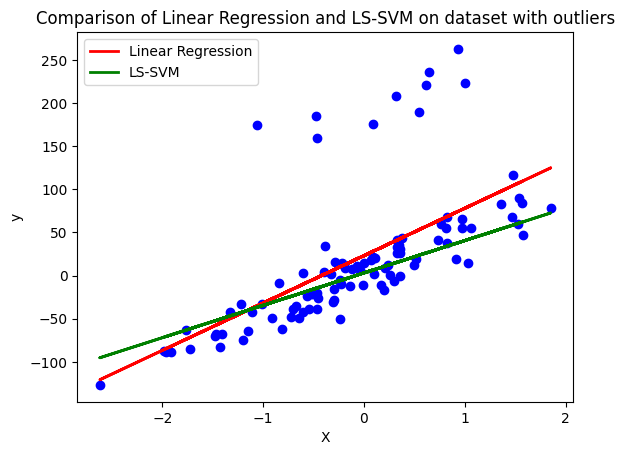

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error

# Generate a regression dataset with outliers
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
y[:10] = y[:10] + 200

# Fit the linear regression model
reg = LinearRegression()
reg.fit(X, y)

# Fit the LS-SVM model
lsvr = LinearSVR(C=1)
lsvr.fit(X, y)

# Predict the target values
reg_pred = reg.predict(X)
lsvr_pred = lsvr.predict(X)

# Calculate the MSE for the models
reg_mse = mean_squared_error(y, reg_pred)
lsvr_mse = mean_squared_error(y, lsvr_pred)

# Plot the true target values and the predicted values
plt.scatter(X, y, color="blue")
plt.plot(X, reg_pred, color="red", linewidth=2, label="Linear Regression")
plt.plot(X, lsvr_pred, color="green", linewidth=2, label="LS-SVM")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Comparison of Linear Regression and LS-SVM on dataset with outliers")
plt.show()
